In [1]:
import pandas as pd
import numpy as np
import random
from ag import alg_genetico
from pso import alg_pso
from aco import alg_aco
from teste_luca import hybrid_algorithm

In [2]:
nba = pd.read_csv("data/NBA_Dataset.csv")

In [3]:
nba = nba.fillna(0)

In [4]:
def expand_positions(df):
    new_rows = []  
    for index, row in df.iterrows():
        positions = row['pos'].split('-')
        for pos in positions:
            new_row = row.copy()
            new_row['pos'] = pos
            new_rows.append(new_row)
    return pd.DataFrame(new_rows)

mask = nba['pos'].str.contains('-')  
expanded_rows = expand_positions(nba[mask])
single_position_rows = nba[~mask]  

nba_new = pd.concat([single_position_rows, expanded_rows]).reset_index(drop=True)

In [5]:
nba_PF = nba_new[nba_new["pos"] == "PF"]
nba_SG = nba_new[nba_new["pos"] == "SG"]
nba_C = nba_new[nba_new["pos"] == "C"]
nba_PG = nba_new[nba_new["pos"] == "PG"]
nba_SF = nba_new[nba_new["pos"] == "SF"]

In [6]:
candidatos_PF = nba_PF[nba_PF["award_share"] > 0]
candidatos_SG = nba_SG[nba_SG["award_share"] > 0]
candidatos_C = nba_C[nba_C["award_share"] > 0]
candidatos_PG = nba_PG[nba_PG["award_share"] > 0]
candidatos_SF = nba_SF[nba_SF["award_share"] > 0]

Tempo de execução: 25.4395854473114
Melhor aptidão: 4.1405814312020555
Melhores atributos:
['vorp', 'ws_per_48', 'dbpm', 'ast_pct', 'win_loss_pct', 'usg_pct', 'fta_per_g', 'fga_per_g', 'fg2a_per_g', 'blk_per_g']
Geração: 8


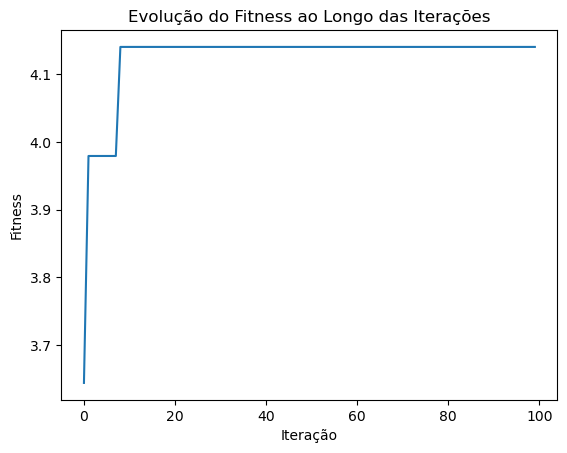

['vorp',
 'ws_per_48',
 'dbpm',
 'ast_pct',
 'win_loss_pct',
 'usg_pct',
 'fta_per_g',
 'fga_per_g',
 'fg2a_per_g',
 'blk_per_g']

In [13]:
hybrid_algorithm(candidatos_PF, plot_details=True)

Tempo de execução: 75.56822633743286
Melhor aptidão: 5.425483164079248
Melhores atributos:
['bpm', 'vorp', 'ws_per_48', 'per', 'ws', 'obpm', 'dbpm', 'ast_pct', 'ows', 'win_loss_pct']
Geração: 287


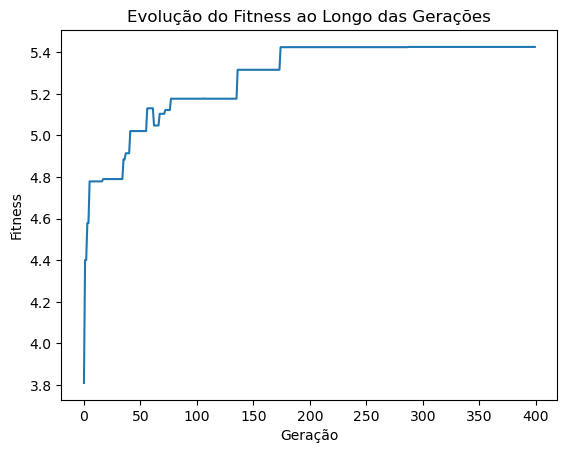

['bpm',
 'vorp',
 'ws_per_48',
 'per',
 'ws',
 'obpm',
 'dbpm',
 'ast_pct',
 'ows',
 'win_loss_pct']

In [8]:
alg_genetico(candidatos_PF, plot_details=True)

Tempo de execução: 17.13890242576599
Melhor aptidão: 4.736640786311234
Melhores atributos:
['bpm', 'vorp', 'ws_per_48', 'ws', 'ows', 'win_loss_pct', 'fg2_per_g', 'mov', 'mov_adj', 'ft_per_g']
Geração: 241


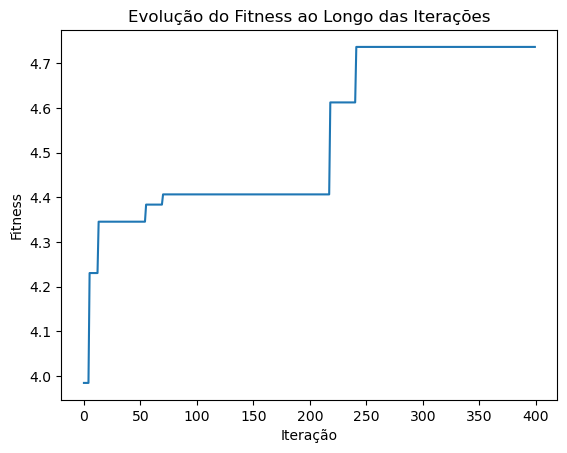

['bpm',
 'vorp',
 'ws_per_48',
 'ws',
 'ows',
 'win_loss_pct',
 'fg2_per_g',
 'mov',
 'mov_adj',
 'ft_per_g']

In [9]:
alg_aco(candidatos_PF, plot_details=True)

Tempo de execução: 33.97513818740845
Melhor aptidão: 4.520103551950756
Melhores atributos:
['bpm', 'ws_per_48', 'ws', 'obpm', 'dbpm', 'ast_pct', 'ows', 'usg_pct', 'fg_pct', 'stl_pct']
Geração: 5


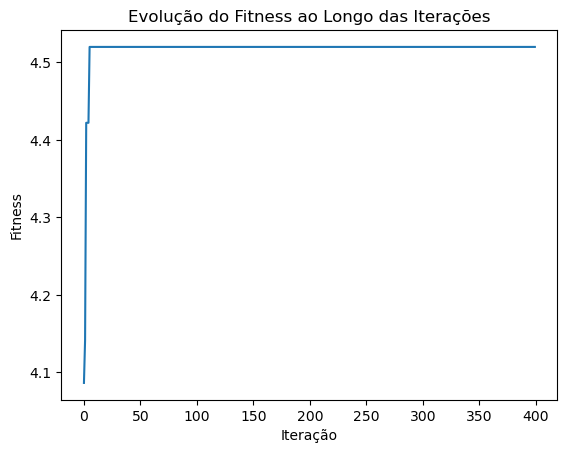

['bpm',
 'ws_per_48',
 'ws',
 'obpm',
 'dbpm',
 'ast_pct',
 'ows',
 'usg_pct',
 'fg_pct',
 'stl_pct']

In [10]:
alg_pso(candidatos_PF, plot_details=True)